<a href="https://colab.research.google.com/github/EvgSkv/logica/blob/main/examples/Logica_example_News_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logica example: News Clusters

In this CoLab we demonstrate Logica syntax when extracting graph of newsmakers
from GDELT public BigQuery table.

## Install and import Logica

In [1]:
!pip install logica

     |████████████████████████████████| 573kB 2.7MB/s 


In [2]:
from logica import colab_logica
from google.colab import auth
auth.authenticate_user()
colab_logica.SetProject('YOUR_PROJECT_ID')

## Extracting Data

In [3]:
%%logica Relates, PersonWeight

# Extracting the graph of common mentions of people.
@Limit(Relates, 200);
@OrderBy(Relates, "logica_value desc");
Relates(p1, p2) += 1 :-
  p1 > p2,  # Computing relationship for each pair only once.
  gdelt-bq.gdeltv2.gkg(persons:, date:),
  Substr(ToString(date), 0, 6) == "202009",
  the_persons == Split(persons, ";"),
  p1 in the_persons,
  p2 in the_persons;

# For the extracted graph finding weights of the people as
# total number of mentions.
@OrderBy(PersonWeight, "weight desc");
PersonWeight(person:, weight? += v) distinct :-
  v == Relates(person, px) | v == Relates(py, person);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Relates


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Relates_sql variable.
SELECT
  x_4 AS col0,
  x_5 AS col1,
  SUM(1) AS logica_value
FROM
  gdelt-bq.gdeltv2.gkg AS gdeltbq_gdeltv2_gkg, UNNEST(SPLIT(gdeltbq_gdeltv2_gkg.persons, ";")) as x_4, UNNEST(SPLIT(gdeltbq_gdeltv2_gkg.persons, ";")) as x_5
WHERE
  (x_4 > x_5) AND
  SUBSTR(CAST(gdeltbq_gdeltv2_gkg.date AS STRING), 0, 6) = "202009"
GROUP BY col0, col1 ORDER BY logica_value desc LIMIT 200;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Relates variable.


,col0,col1,logica_value
0,joe biden,donald trump,107458
1,donald trump,barack obama,32352
2,joe biden,barack obama,26302
3,hillary clinton,donald trump,24429
4,joe biden,hillary clinton,21966
...,...,...,...
195,ruth bader ginsburg,justice john roberts,3112
196,ruth bader ginsburg,lindsey graham,3104
197,susan collins,lindsey graham,3093
198,jimmy carter,donald trump,3089


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running PersonWeight


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at PersonWeight_sql variable.
WITH t_1_Relates AS (SELECT
  x_13 AS col0,
  x_14 AS col1,
  SUM(1) AS logica_value
FROM
  gdelt-bq.gdeltv2.gkg AS gdeltbq_gdeltv2_gkg, UNNEST(SPLIT(gdeltbq_gdeltv2_gkg.persons, ";")) as x_13, UNNEST(SPLIT(gdeltbq_gdeltv2_gkg.persons, ";")) as x_14
WHERE
  (x_13 > x_14) AND
  SUBSTR(CAST(gdeltbq_gdeltv2_gkg.date AS STRING), 0, 6) = "202009"
GROUP BY col0, col1 ORDER BY logica_value desc LIMIT 200),
t_0_PersonWeight_MultBodyAggAux AS (SELECT * FROM (
  
    SELECT
      Relates.col0 AS person,
      Relates.logica_value AS weight
    FROM
      t_1_Relates AS Relates
   UNION ALL
  
    SELECT
      t_2_Relates.col1 AS person,
      t_2_Relates.logica_value AS weight
    FROM
      t_1_Relates AS t_2_Relates
  
) AS UNUSED_TABLE_NAME  )
SELECT
  PersonWeight_MultBodyAggAux.person AS person,
  SUM(PersonWeight_MultBodyAggAux.weight) AS weight
FROM
  t_0_PersonWeight_MultBodyAggAux AS PersonWeight_MultBodyAggAux
GROUP BY person 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at PersonWeight variable.


,person,weight
0,donald trump,533932
1,joe biden,368102
2,barack obama,166446
3,breonna taylor,85550
4,justice ruth bader ginsburg,80025
...,...,...
83,michel barnier,3203
84,clarence thomas,3198
85,robert mueller,3195
86,jay inslee,3193


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plotting clusters of newsmakers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

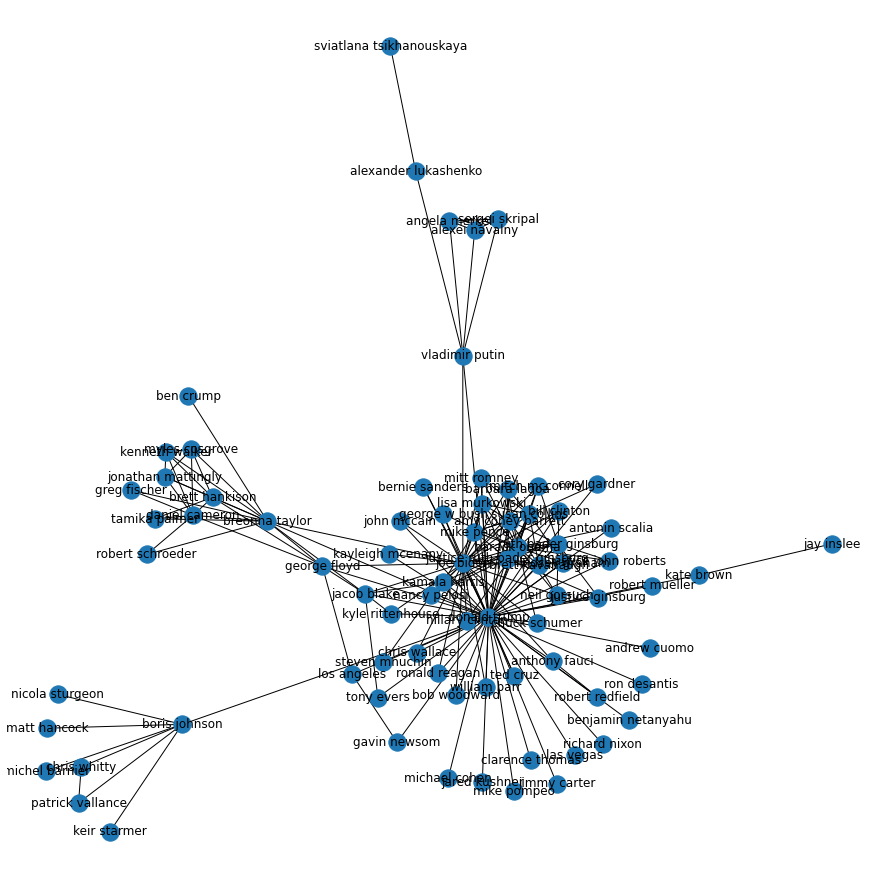

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

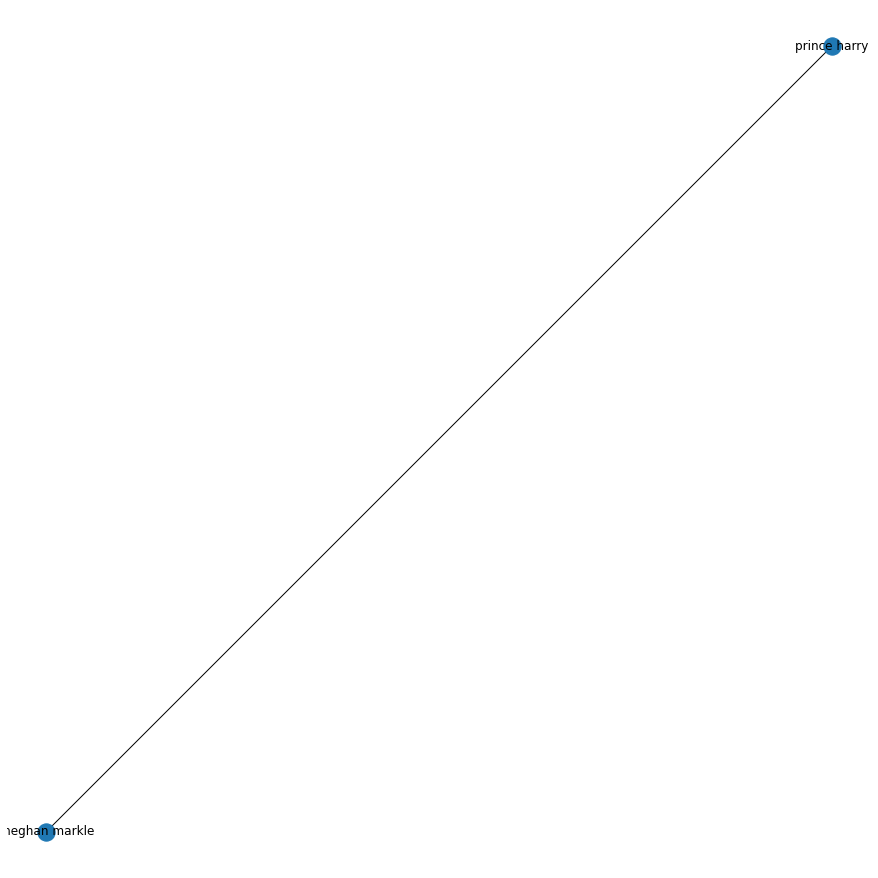

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

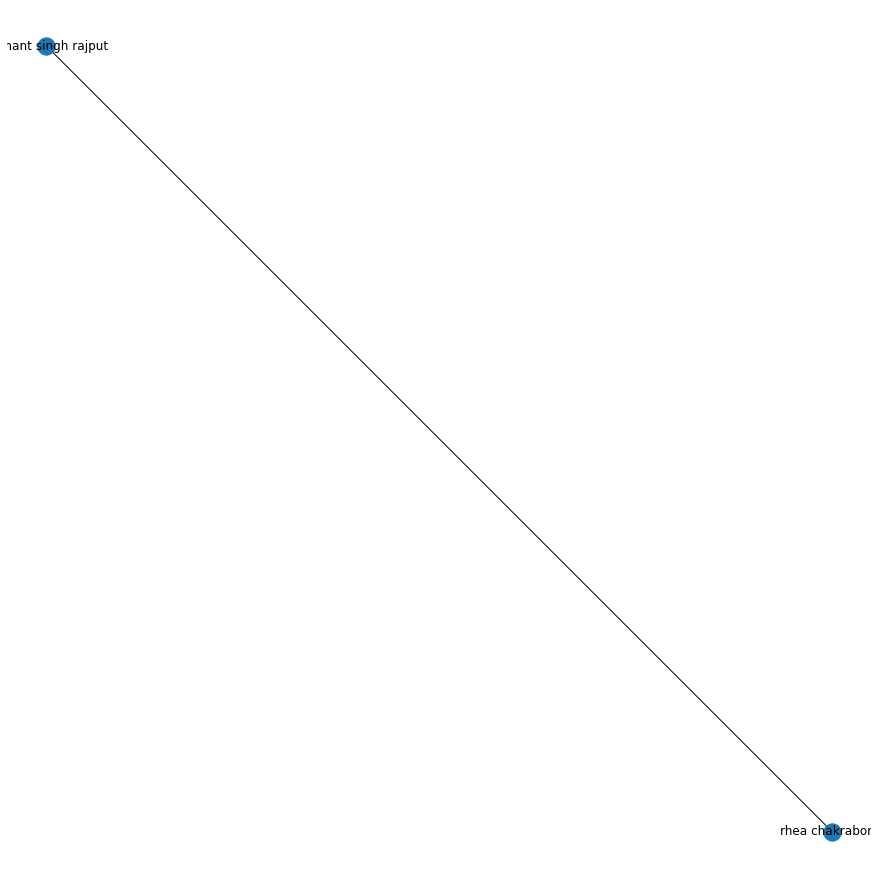

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

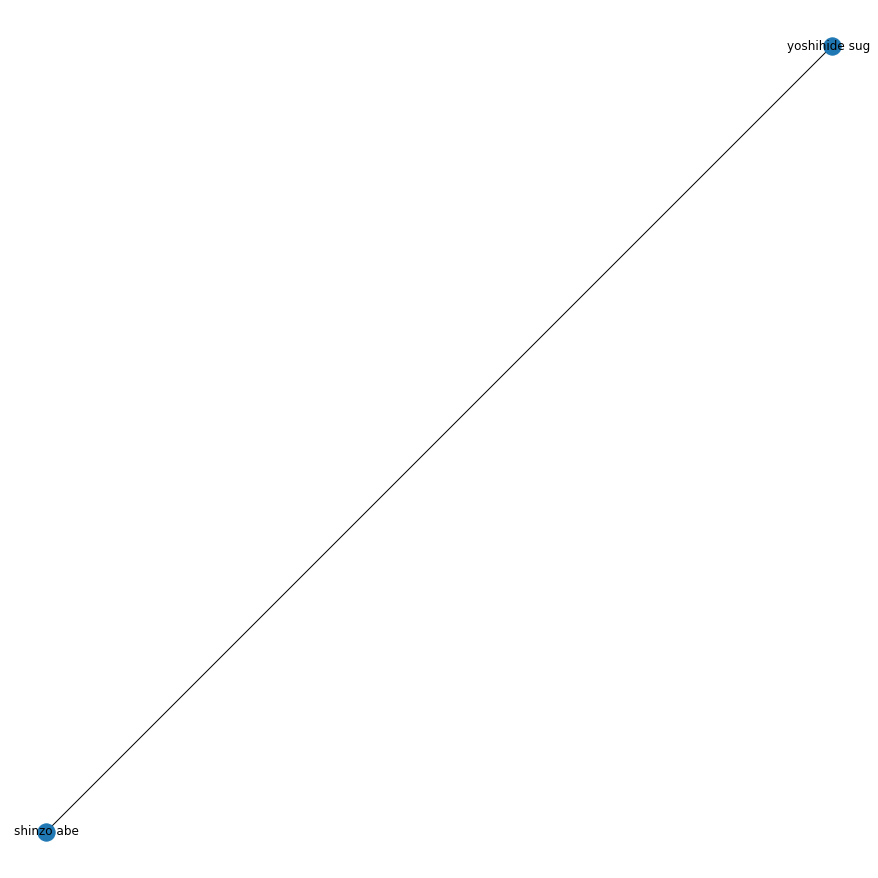

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

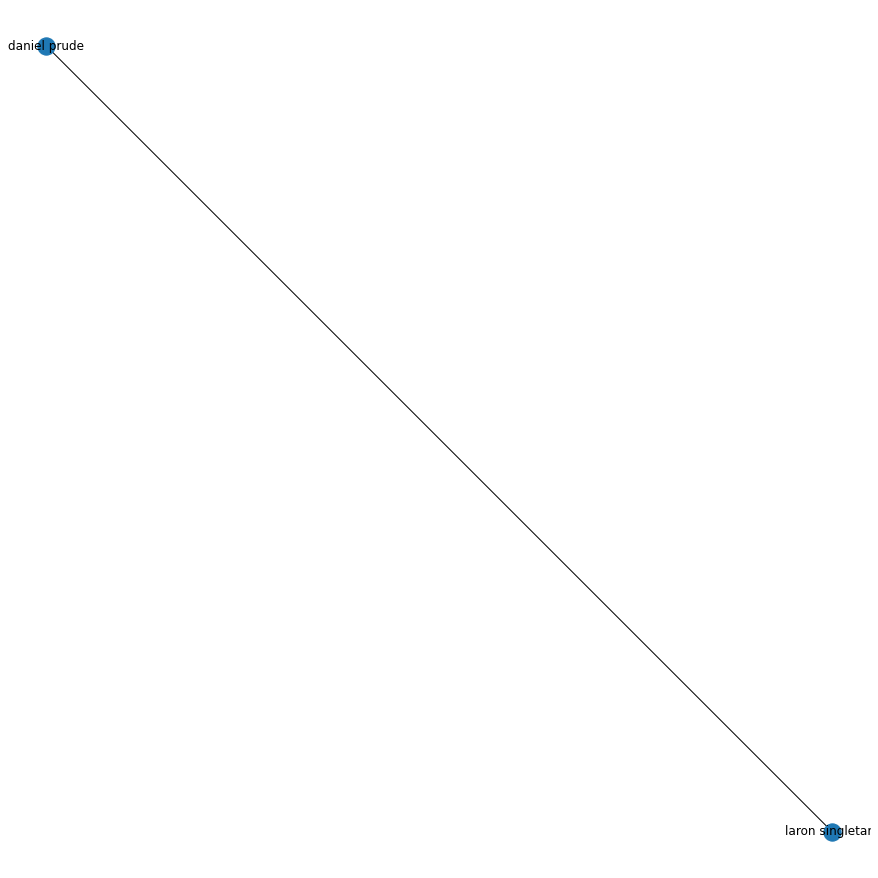

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

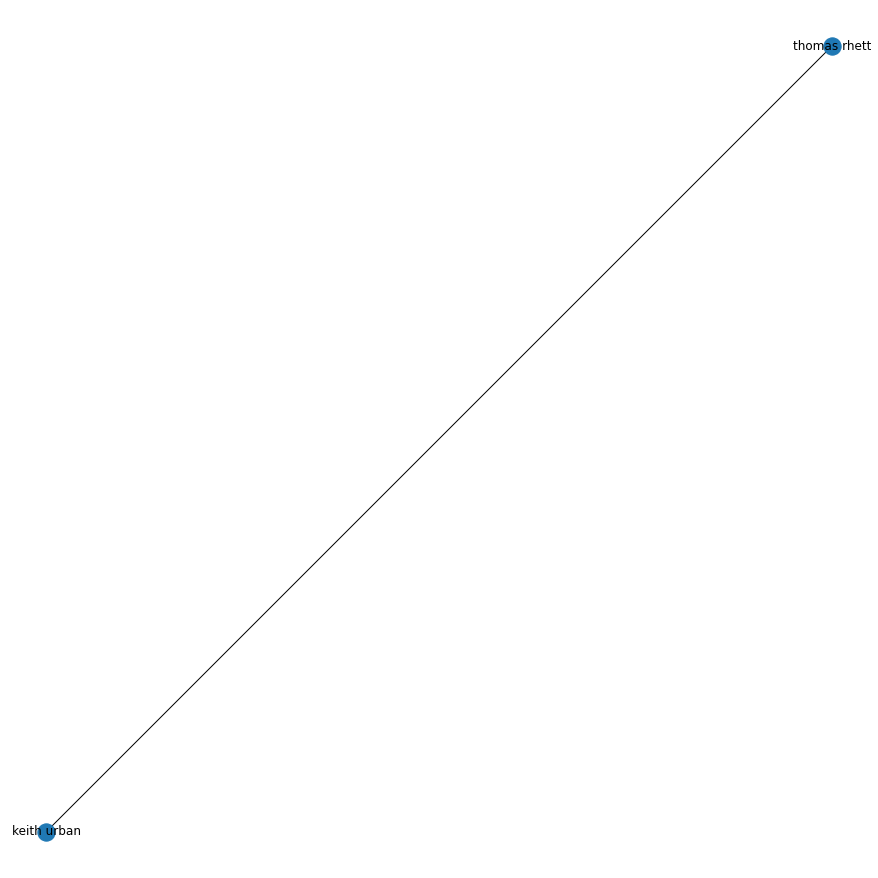

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import networkx as nx
from matplotlib import pyplot
import numpy
from google.colab import widgets

# Create the graph.
G = nx.from_pandas_edgelist(Relates, source='col0', target='col1')

# Find connected components.
components = list(nx.connected_components(G))

# Find most popular newsmaker in each connected component.
representatives = []
for c in components:
  Component = PersonWeight[PersonWeight['person'].isin(c)]
  representatives.append(
      Component[Component['weight'] == max(Component['weight'])][
          'person'].values[0])

# Plot connected components in tabs.
tabbar = widgets.TabBar(representatives)
for c, r in zip(components, representatives):
  with tabbar.output_to(r):
    Component = PersonWeight[PersonWeight['person'].isin(c)]
    pyplot.figure(figsize=(12, 12))
    g = G.subgraph(c)
    nx.draw(g, with_labels=True)

with tabbar.output_to(representatives[0]):
  pass
